[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/ADA440_Python_4_DS/blob/main/ALE/ALE3.ipynb)

## In this assignment you will do a bit explanatory data analysis.

In [2]:
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.datasets import load_diabetes

In [3]:
dataset = load_diabetes(as_frame = True)
dataset["data"]["blood_sugar"] = dataset["target"]
dataset_ = dataset["data"]

In [4]:
## This dataset is normalized!!! So that there are negative numbers in the age column.
dataset_

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,blood_sugar
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## Answer the following questions
## Please keep your answers in clear and concise.

In [17]:
## Sketch histogram of blood_sugar distribution. Is it right skewed or left skewed?
####ANSWER: It is right skewed because people with low blood sugar are more likely to have...


## Which feature is most corrolated with blood_sugar? (sketch a X, y graph)
####ANSWER:  Feature is bmi(body mass index??)..

## In general which feature is least important to blood sugar? (sketch X, y graph)
#####ANSWER:: Least important feature is the sex.. It is a fact that gender has little to do with it.


## What happens as people age? Blood sugar increases or decreases?
####ANSWER: Generally, according to the table we have created, we can say that as age increases, blood sugar levels increase.

## Do you expect high blood sugar value in men or woman? Sketch a graph.
####Answer: I can infer that women's blood sugar levels are slightly higher...

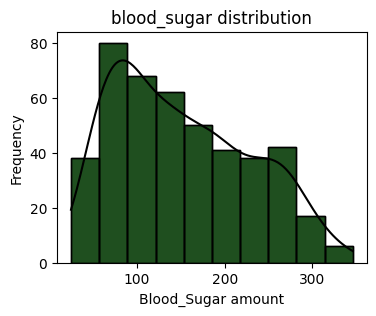

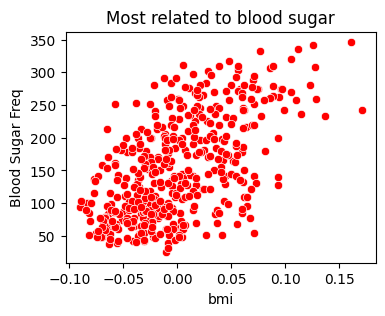

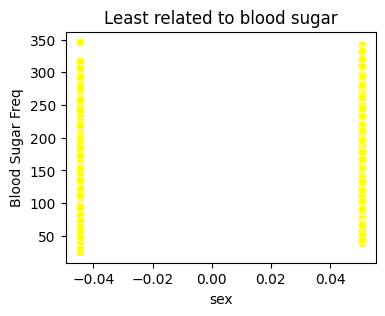

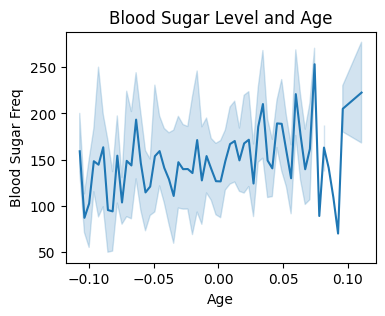

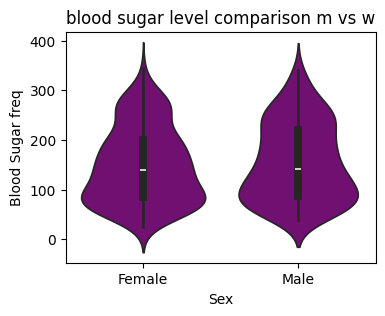

In [24]:
##Note that for me ::: Scatter plot, a chart used to visualize the relationship between two variables

plot.figure(figsize=(4, 3))
sns.histplot(dataset_["blood_sugar"], color='green') ##Kernel Density Estimation(kde) ##if i write kde = true ,, there is a line
sns.histplot(dataset_["blood_sugar"], kde=True, color ="black")
plot.title("blood_sugar distribution")
plot.xlabel("Blood_Sugar amount")
plot.ylabel("Frequency")
plot.show()


correlation_matrix = dataset_.corr()
##For matrix why are we using matrix...(((I did research on the internet)))...
## a correlation matrix is a tool used to analyze the relationship between variables in a data set using
## pearson correlation coefficients, a statistical technique.
##.correlation coefficients measure the strength and direction of the linear relationship between variables.


blood_sugar_corr = correlation_matrix["blood_sugar"].abs().sort_values(ascending=False)
##Gets correlation values by their absolute values and sorts them


most_correlated_feature = blood_sugar_corr.index[1]
##We take the 1st index value because the first one belongs to blood sugar. So we got the second highest value
least_correlated_feature = blood_sugar_corr.index[-1]##Last element
##We chose the feature with the lowest correlation to the blood sugar column.



##Here I created a table with the variables that are most related.
##We can think of it as a comparison of the blood sugar distribution we got from the DataSet, since it is the most relevant.
##Plotting
plot.figure(figsize=(4, 3))
sns.scatterplot(x=dataset_[most_correlated_feature], y=dataset_["blood_sugar"], color ='red')
plot.title("Most related to blood sugar")
plot.xlabel(most_correlated_feature)
plot.ylabel("Blood Sugar Freq")
plot.show()

###Here I wrote the relationship between the process we did above and the least related feature on the graph.
plot.figure(figsize=(4, 3))
sns.scatterplot(x=dataset_[least_correlated_feature], y=dataset_["blood_sugar"],color = 'yellow')
plot.title("Least related to blood sugar")
plot.xlabel(least_correlated_feature)
plot.ylabel("Blood Sugar Freq")
plot.show()

# Blood sugar level trend with age
plot.figure(figsize=(4, 3))##size
sns.lineplot(x=dataset_["age"], y=dataset_["blood_sugar"])## we take datas (appropriate variables)
plot.title("Blood Sugar Level and Age")
plot.xlabel("Age")
plot.ylabel("Blood Sugar Freq")
plot.show()

# Blood sugar level comparison between male and female
plot.figure(figsize=(4, 3))
sns.violinplot(x=dataset["data"]["sex"], y=dataset["target"], color ='purple')
plot.title("blood sugar level comparison m vs w")
plot.xlabel("Sex")
plot.ylabel("Blood Sugar freq")
plot.xticks([0, 1], ["Female", "Male"]) ##for x line
plot.show()